<a href="https://colab.research.google.com/github/jumafernandez/BDM/blob/master/Guias/Guia_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes con Scikit Learn

## Introducción
En esta guía vamos a experimientar cómo trabajar con el algoritmo de _naive Bayes_. Se trata de una técnica supervisada de aprendizaje probabilístico que se aplica a tareas de clasificación. Vamos a utilizar el dataset _iris_, con el que ya hemos trabajado en varias guías de laboratorio y TP's.
<br />
A lo largo de esta guía veremos:
- Cómo preprocesar el dataset y prepararlo para trabajar con Naive Bayes (NB) en Scikit Learn,
- Cómo entrenar un clasificador NB con la librería Scikit Learn,
- Cómo predecir la clase ante la aparición de nuevas instancias utilizando el modelo y la probabilidad aparejada,
- Cuáles son los hiper-parámetros más importantes del algoritmo,
- Cómo generar nuevas métricas de evaluación de los modelos.

## Trabajando con datos en Scikit Learn (Python)
Para iniciar vamos a cargar los datos desde Scikit-Learn, que es una de las modalidades que ya veníamos trabajando. Como sabemos, se va a instanciar un objeto bunch que es básicamente un diccionario:


In [0]:
# Importamos el dataset iris de la librerías sklearn.datasets
from sklearn.datasets import load_iris

# Iris será un objeto "bunch" que es básicamente un diccionario de Python con un conjunto de claves
iris = load_iris()


### Preprarando los datos para trabajar con NB en Scikit Learn

Al igual que hicimos con árboles de clasificación, vamos a tener que transformar los atributos discretos a numéricos previo a entrenar el clasificador. En este caso, el dataset no va a sufrir modificaciones puesto que todos sus _features_ son continuos, pero el código es facilmente trasladable a datasets con atributos cualitativos.

In [0]:
from sklearn import preprocessing

# Cantidad de columnas
ncols=iris.data.shape[1]

# Creamos el objeto labelEncoder
le = preprocessing.LabelEncoder()

# Numerizamos todos los atributos que no sean numéricos
for column in range(0, ncols-1):
  if (iris.data[:,column].dtype == object):
    iris.data[:,column] = le.fit_transform(iris.data[:,column])

iris.data[0:6]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

Y generamos nuestro conjunto de _train_ y de _test_ como venimos haciendo:

In [0]:
from sklearn.model_selection import train_test_split

# Separo en 70-30 entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0, test_size=0.2)


## Clasificador Naive Bayes con Scikit Learn

Scikit Learn provee tres clases para clasificación con Naive Bayes:
- __GaussianNB:__ Éste clasificador supone que la distribución de los datos es gaussiana (__warning!__).
-  __MultinomialNB:__ En éste caso, el caso, el clasificador asume un distribución multinomial de los datos.
- __ComplementNB:__ Ésta es una tercera implementación del clasificador que posee optimizaciones para trabajar con datasets desbalanceados.
<br /> 

En ésta guía vamos a limitarnos a trabajar de manera indistinta con las clases para realizar diferentes pruebas puesto que resulta muy sencillo cambiar el clasificador ya que las tres clases poseen métodos y parámetros muy similares.

### Entrenando un clasificador NB
A continuación, vamos a explorar como entrenar clasificador Naive Bayes, analizar el modelo entrenado y evaluarlo:

In [0]:
# Importamos el módulo GaussianNB de scikit-learn
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB

#modelo = GaussianNB()
#modelo = MultinomialNB()
modelo = ComplementNB()

modelo

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

Ahora vamos a entrenar el modelo, para ello le pasamos los datos de los _features_ y el _target_:

In [0]:
# Ahora vamos a entrenar el dato con el método fit -le pasamos los X e Y
# X e Y (X=atributos e Y=target)
modelo.fit(x_train, y_train)


ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [0]:
# Número de muestras encontradas para cada clase durante el ajuste. 
# (Este valor es ponderado por el peso de la muestra cuando se proporciona.)
print("Número de muestras encontradas para cada clase durante el ajuste:")
print(str(iris.target_names[0]) + ": " + str(modelo.class_count_[0]))
print(str(iris.target_names[1]) + ": " + str(modelo.class_count_[1]))
print(str(iris.target_names[2]) + ": " + str(modelo.class_count_[2]))

Número de muestras encontradas para cada clase durante el ajuste:
setosa: 39.0
versicolor: 37.0
virginica: 44.0


In [0]:
modelo.feature_count_

array([[195.8, 132.7,  57. ,   9.4],
       [217.8, 102.2, 156. ,  49. ],
       [292.1, 131.5, 244.9,  89.4]])

In [0]:
print("Probabilidad empírica de las features x dada la clase y: P(x_i|y)")
print("x = " + str(iris.feature_names))
print("y = " + str(iris.target_names)+"\n")

modelo.feature_log_prob_

Probabilidad empírica de las features x dada la clase y: P(x_i|y)
x = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y = ['setosa' 'versicolor' 'virginica']



array([[0.92381763, 1.7016834 , 1.1637882 , 2.22264401],
       [0.86125488, 1.47292859, 1.34001013, 2.45024467],
       [0.80128964, 1.36519585, 1.46262783, 2.74430961]])

In [0]:
print("Coeficientes del clasificador:")
modelo.coef_

Coeficientes del clasificador:


array([[0.92381763, 1.7016834 , 1.1637882 , 2.22264401],
       [0.86125488, 1.47292859, 1.34001013, 2.45024467],
       [0.80128964, 1.36519585, 1.46262783, 2.74430961]])

In [0]:
modelo.intercept_

array([-1.1239301 , -1.17657383, -1.00330211])

## Utilizando el modelo para clasificar/predecir casos nuevos

A partir del modelo generado, podríamos darle un nuevo caso y el clasificador debería clasificarlo y devolver la proba asociada a cada clase:

In [0]:
# Haciendo nuevas predicciones a partir de los datos
pred_ejemplo1 = int(modelo.predict([[5, 7, 1, 3]]))
pred_ejemplo2 = int(modelo.predict([[1, 1, 1, 1]]))
pred_ejemplo3 = int(modelo.predict([[15, 17, 11, 13]]))

proba_ejemplo1 = modelo.predict_proba([[5, 7, 1, 3]])

print("La probabilidad asociada es " +str(proba_ejemplo1)+ "para las clases" + str(iris.target_names) + " respectivamente.")
print(f"En función de las probabilidades, este ejemplo corresponde a una flor {iris.target_names[pred_ejemplo1]}.\n")

print(f"Este ejemplo corresponde a una flor {iris.target_names[pred_ejemplo2]}.")
print(f"Este ejemplo corresponde a una flor {iris.target_names[pred_ejemplo3]}.")


La probabilidad asociada es [[0.5953666  0.20728691 0.19734649]]para las clases['setosa' 'versicolor' 'virginica'] respectivamente.
En función de las probabilidades, este ejemplo corresponde a una flor setosa.

Este ejemplo corresponde a una flor virginica.
Este ejemplo corresponde a una flor virginica.


## Parámetros de NB

Como la mayoría de los algoritmos de aprendizaje automático, NB posee hiper-parámetros que podemos ajustar.

In [0]:
from sklearn import metrics

# En este caso, instancio, los parametros a ajustar son:
# GuassianNB:
# priors: Probabilidades previas de las clases.
# var_smoothing: Parte de la mayor variación de todas las características que se agrega a las variaciones para la estabilidad del cálculo.

# MultinomialNB:
# alpha: Parámetro de suavizado aditivo (Laplace/Lidstone)
# class_prior: Idem priors de GaussianNB.

# ComplementNB:
# A los parámetros del Multinomial se le agrega norm.
# norm: Si se realiza o no una normalización de los pesos.
modelo_parametrizado = GaussianNB()

# Entreno el modelo con el mismo muestreo generado antes (70-30 %)
modelo_parametrizado = modelo_parametrizado.fit(x_train,y_train)

# Realizo la predicción de y con el x_test
y_pred = modelo_parametrizado.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9666666666666667


## Métricas de evaluación de modelos

Como vimos en teoría, luego debemos evaluar el modelo generado, para saber cuán preciso es. Vamos a incluir F-score al set que venimos utilizando, la curva ROC y el heatmap para dar un enfoque más gráfico a la matriz de confusión.

Comenzamos con la curva ROC:

NB: ROC AUC=0.991


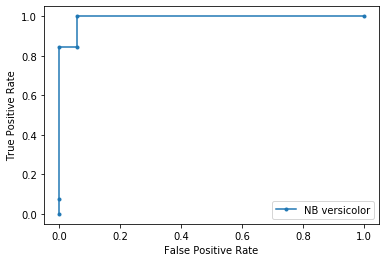

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import label_binarize

# Para la versión 0.22 de scikit-learn se incorpora el método plot_roc_curve
# https://scikit-learn.org/dev/modules/generated/sklearn.metrics.plot_roc_curve.html
# Por ahora, lo graficamos a mano con roc_auc_score

# Seteo la clase a graficar (para iris entre 0-2)
clase_elegida = 1

# Me quedo con la clase elegida
y = label_binarize(y_test, classes=[0, 1, 2])
y_class = y[:,clase_elegida]

# Calculo las probas para el test
modelo_probas = modelo.predict_proba(x_test)

# Me quedo con la proba para la clase elegida
positivos_probas = modelo_probas[:,clase_elegida]

# calculate scores
lr_auc = roc_auc_score(y_class, positivos_probas)

# summarize scores
print('NB: ROC AUC=%.3f' % (lr_auc))

# Calcula la curva ROC
lr_fpr, lr_tpr, _ = roc_curve(y_class, positivos_probas)

# Plotea
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='NB ' + iris.target_names[clase_elegida])

# Nombres de los ejes
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# Muestra las leyendas
pyplot.legend()
# Plotea
pyplot.show()



 Ahora calculamos F-score:

In [0]:
from sklearn.metrics import fbeta_score

# Parametro average: se utiliza en multiclase, si no está seteado devuelve la métrica para cada clase
# Si se setea se devuelve una métrica única para el modelo (por ejemplo el promedio del indicador para todas las clases)

fbeta_score(y_test, y_pred, average='micro', beta=0.5)


0.9666666666666666

Por último, vamos a realizar un heatmap de la matriz de confusión del modelo:

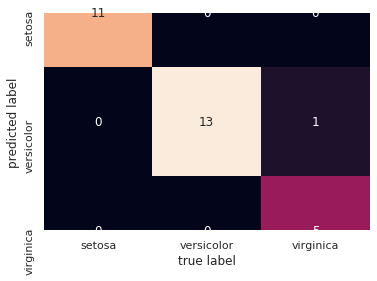

In [0]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

species = np.array(y_test)
predictions = np.array(y_pred)

mat = metrics.confusion_matrix(species, predictions)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');


## Referencias & Recursos Web

- https://scikit-learn.org/stable/modules/naive_bayes.html

- https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

- https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

- https://www.sicara.ai/blog/2018-02-28-naive-bayes-classification-sklearn

- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
